# Laboratorio 6
## Análisis de paquetes de red
Universidad del Valle de Guatemala <br>
Security Data Science <br>
Pablo Andrés Zamora Vásquez <br>
Carné 21780

In [ ]:
from scapy.all import sniff
from scapy.all import rdpcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preámbulo

### 1. Instale la librería scapy
### 3. Verifique que la herramienta fue correctamente instalada:

*a. Capture 25 paquetes de su red doméstica (no de la red de la UVG) y asígnelos a una variable.*

*b. Imprima el tipo de variable, la longitud y el contenido de la variable.*

*c. Imprima el tipo de dato del primer paquete capturado.*

*d. Imprima el contenido de 5 paquetes.*

In [ ]:
# Capturar 25 paquetes
packets = sniff(count=25)

# Imprimir el tipo de variable, su longitud y algunos contenidos
print("Tipo de 'paquetes':", type(packets))
print("Número de paquetes capturados:", len(packets))

# Tipo de dato del primer paquete
print("Tipo del primer paquete:", type(packets[0]))

# Imprimir el resumen de 5 paquetes
print('\nContenido de los primeros 5 paquetes:')
for pkt in packets[:5]:
    print(pkt.summary())


Tipo de 'paquetes': <class 'scapy.plist.PacketList'>
Número de paquetes capturados: 25
Tipo del primer paquete: <class 'scapy.layers.l2.Ether'>

Contenido de los primeros 5 paquetes:
Ether / IP / TCP 192.168.1.57:58269 > 192.168.1.16:8009 PA / Raw
Ether / IP / TCP 192.168.1.16:8009 > 192.168.1.57:58269 PA / Raw
Ether / IP / TCP 192.168.1.57:58269 > 192.168.1.16:8009 A
Ether / IPv6 / UDP 2800:98:1612:8d0:2d7f:a702:f2f1:fb37:59182 > 2607:f8b0:4008:806::200e:https / Raw
Ether / IPv6 / UDP 2800:98:1612:8d0:2d7f:a702:f2f1:fb37:59182 > 2607:f8b0:4008:806::200e:https / Raw


## Análisis estadístico

### 1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable

In [ ]:
packets_pcap = rdpcap("analisis_paquetes.pcap")
print("Número de paquetes en el PCAP:", len(packets_pcap))

Número de paquetes en el PCAP: 62


### 2. Convierta la variable a un DataFrame.

In [ ]:
data = []
for pkt in packets_pcap:
    # Verificar si el paquete tiene capa IP
    if pkt.haslayer("IP"):
        src = pkt["IP"].src
        dst = pkt["IP"].dst
        
        # Inicializar los puertos a None
        src_port = None
        dst_port = None
        
        # Verificar si el paquete tiene capa TCP o UDP
        if pkt.haslayer("TCP"):
            src_port = pkt["TCP"].sport
            dst_port = pkt["TCP"].dport
        elif pkt.haslayer("UDP"):
            src_port = pkt["UDP"].sport
            dst_port = pkt["UDP"].dport
        
        # Convertir el payload a bytes y obtener su longitud
        payload_bytes = bytes(pkt.payload)
        payload_len = len(payload_bytes)
        
        timestamp = pkt.time
        
        data.append({
            "src": src,
            "dst": dst,
            "src_port": src_port,
            "dst_port": dst_port,
            "payload": payload_bytes,
            'payload_legible': payload_bytes.decode(errors='ignore'),
            "payload_len": payload_len,
            "time": timestamp
        })

df = pd.DataFrame(data)


### 3. Muestre el contenido de las primeras 5 filas del dataset.

In [54]:
# Mostrar las primeras 5 filas
print(df.head())

           src          dst  src_port  dst_port  \
0   10.1.10.53  84.54.22.33        53        53   
1  84.54.22.33   10.1.10.53        53        53   
2   10.1.10.53  84.54.22.33        53        53   
3  84.54.22.33   10.1.10.53        53        53   
4   10.1.10.53  84.54.22.33        53        53   

                                             payload  \
0  b'E\x00\x03\xc1\x00\x01\x00\x00@\x11R\xe6\n\x0...   
1  b"E \x00T\xe6'\x00\x00z\x116\x0cT6\x16!\n\x01\...   
2  b'E\x00\x03\xcf\x00\x01\x00\x00@\x11R\xd8\n\x0...   
3  b"E \x00T\xe8e\x00\x00z\x113\xceT6\x16!\n\x01\...   
4  b'E\x00\x03\xf4\x00\x01\x00\x00@\x11R\xb3\n\x0...   

                                     payload_legible  payload_len  \
0  E    @R\n\n5T6! 5 5         google...          961   
1  E  T'  z6T6!\n\n5 5 5 @%       google...           84   
2  E    @R\n\n5T6! 5 5         google...          975   
3  E  Te  z3T6!\n\n5 5 5 @'       googlec...           84   
4  E    @

### 4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port

In [56]:
# Mostrar columnas de interés
print(df[["src", "dst", "src_port", "dst_port"]])

            src          dst  src_port  dst_port
0    10.1.10.53  84.54.22.33        53        53
1   84.54.22.33   10.1.10.53        53        53
2    10.1.10.53  84.54.22.33        53        53
3   84.54.22.33   10.1.10.53        53        53
4    10.1.10.53  84.54.22.33        53        53
..          ...          ...       ...       ...
57  84.54.22.33   10.1.10.53        53        53
58   10.1.10.53  84.54.22.33        53        53
59  84.54.22.33   10.1.10.53        53        53
60   10.1.10.53  84.54.22.33        53        53
61  84.54.22.33   10.1.10.53        53        53

[62 rows x 4 columns]


### 5. Estadísticas

*a. Muestre todas las IP origen*

*b. Muestre todas las IP destino*

In [57]:
src_ips = df["src"].unique()
print("IPs Origen:", src_ips)

dst_ips = df["dst"].unique()
print("IPs Destino:", dst_ips)


IPs Origen: ['10.1.10.53' '84.54.22.33' '75.75.75.75']
IPs Destino: ['84.54.22.33' '10.1.10.53' '75.75.75.75']


*c. ¿Cuál es la IP origen más frecuente?*

*i. ¿A qué IP destino se comunica con más frecuencia?*<br>
*ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?*<br>
*iii. ¿Desde que puertos origen se comunica?*<br>

In [58]:
most_frequent_src_ip = df["src"].value_counts().idxmax()
print("La IP origen más frecuente es:", most_frequent_src_ip)

df_ip = df[df["src"] == most_frequent_src_ip]
most_frequent_dst_ip = df_ip["dst"].value_counts().idxmax()
print("La IP destino con la que más se comunica", most_frequent_src_ip, "es:", most_frequent_dst_ip)

most_frequent_dst_port = df_ip["dst_port"].value_counts().idxmax()
print("El puerto destino más frecuente es:", most_frequent_dst_port)

src_ports = df_ip["src_port"].unique()
print("Puertos origen desde los que se comunica:", src_ports)

La IP origen más frecuente es: 10.1.10.53
La IP destino con la que más se comunica 10.1.10.53 es: 84.54.22.33
El puerto destino más frecuente es: 53
Puertos origen desde los que se comunica: [   53 15812 23903]


### 6. Gráficas

*a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la suma de los payloads (bytes) enviados desde dichas direcciones*

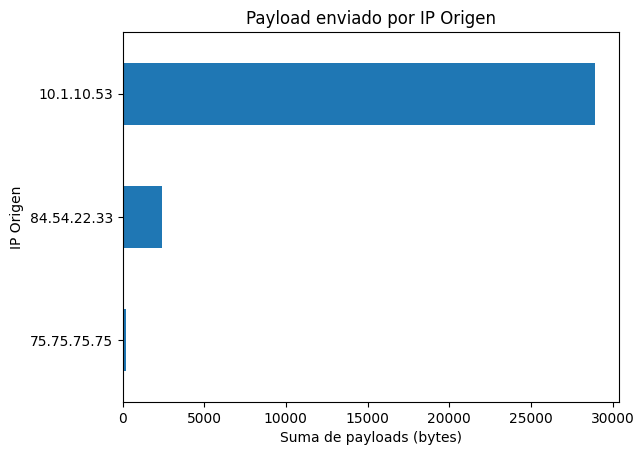

In [ ]:
# a) Gráfica: IPs origen vs suma de payloads enviados
src_payloads_sum = df.groupby("src")["payload_len"].sum().sort_values()
plt.figure()
src_payloads_sum.plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("IP Origen")
plt.title("Payload enviado por IP Origen")
plt.show()

*b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X la suma de los payloads (bytes) recibidos en dichas direcciones*

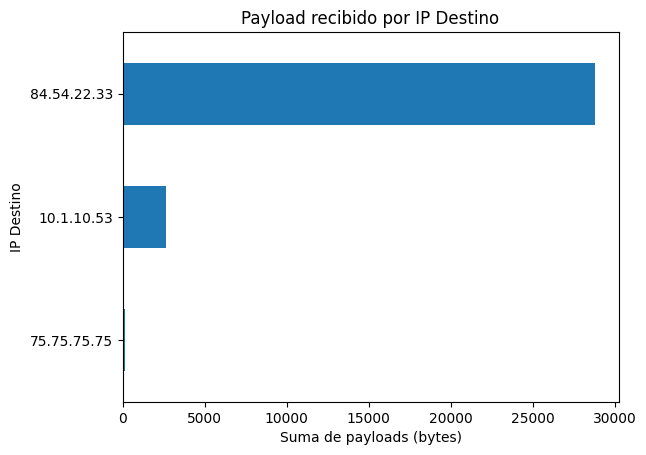

In [36]:
# b) Gráfica: IPs destino vs suma de payloads recibidos
dst_payloads_sum = df.groupby("dst")["payload_len"].sum().sort_values()
plt.figure()
dst_payloads_sum.plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("IP Destino")
plt.title("Payload recibido por IP Destino")
plt.show()

*c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el eje X la suma de los payloads (bytes) enviados de dichos puertos.*

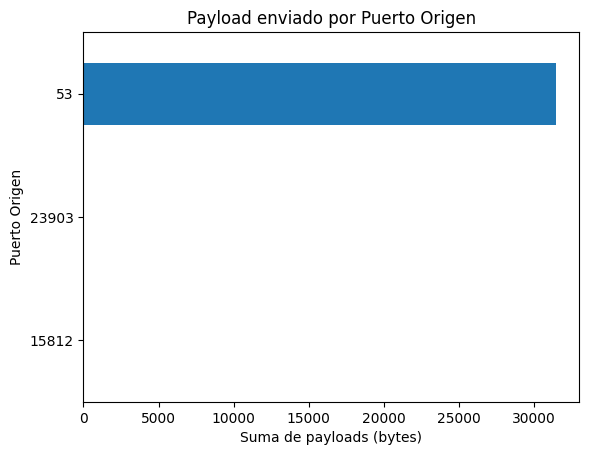

In [37]:
# c) Gráfica: Puertos origen vs suma de payloads enviados
src_ports_payload_sum = df.groupby("src_port")["payload_len"].sum().sort_values()
plt.figure()
src_ports_payload_sum.plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("Puerto Origen")
plt.title("Payload enviado por Puerto Origen")
plt.show()

*d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el eje X la suma de los payloads (bytes) recibidos en dichos puertos.*

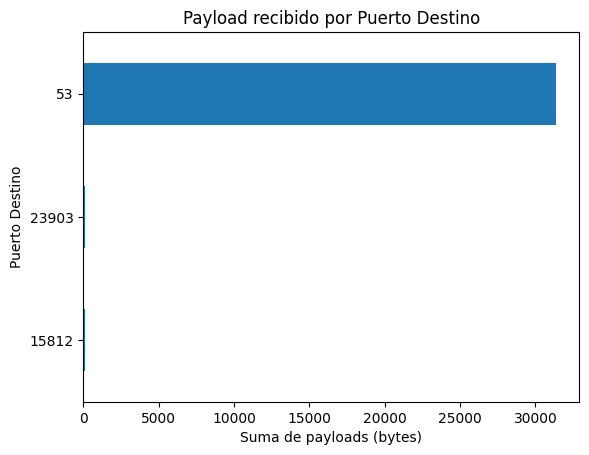

In [38]:
# d) Gráfica: Puertos destino vs suma de payloads recibidos
dst_ports_payloads_sum = df.groupby("dst_port")["payload_len"].sum().sort_values()
plt.figure()
dst_ports_payloads_sum.plot(kind="barh")
plt.xlabel("Suma de payloads (bytes)")
plt.ylabel("Puerto Destino")
plt.title("Payload recibido por Puerto Destino")
plt.show()

*e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el eje X el tiempo, para la IP origen más frecuente.*

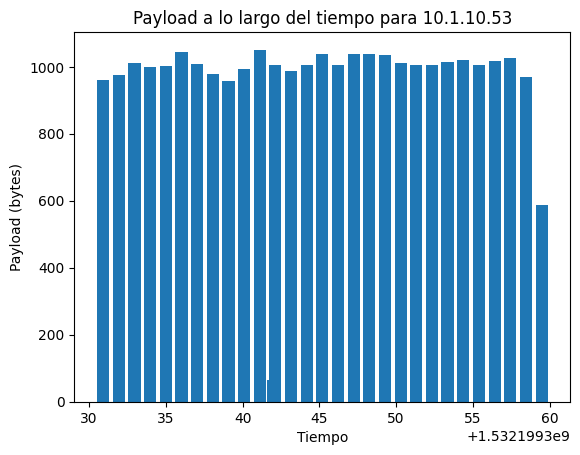

In [39]:
# e) Gráfica: Para la IP origen más frecuente, payload vs tiempo
df_ip_mas = df[df["src"] == most_frequent_src_ip]
# Ordenar por tiempo
df_ip_mas = df_ip_mas.sort_values("time")
plt.figure()
plt.bar(df_ip_mas["time"], df_ip_mas["payload_len"])
plt.xlabel("Tiempo")
plt.ylabel("Payload (bytes)")
plt.title("Payload a lo largo del tiempo para " + most_frequent_src_ip)
plt.show()

*f. Utilizando la información de las estadísticas y la información del comportamiento del tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común el comportamiento?*

No, el comportamiento es **anormal**, ya que las gráficas anteriores demuestran que el payload total enviado por la IP de origen "10.1.10.53" y recibido por la IP destino "84.54.22.33" es **mucho mayor** al payload enviado y recibido entre las demás IPs.

Además, puede notarse fácilmente que casi todos estos paquetes son enviados y recibidos por el **puerto 53**, el cual es el asignado al protocolo **DNS**, utilizado para la resolución de nombres de dominio a direcciones IP. Por tanto, un volumen de tráfico DNS excepcionalmente alto para este puerto podría ser señal de que se está utilizando el DNS para otros fines, como tunneling (exfiltración de datos) o algún otro tipo de actividad maliciosa.

Finalmente, la gráfica que muestra el payload a lo largo del tiempo para la IP más activa, "10.1.10.53", indica que se mantuvo un pico **sostenido** de comunicación durante un **tiempo significativo**, lo cual no es usual para el protocolo DNS asignado al puerto 53, ya que, en circusntancias normales el tráfico que pasa por este debería fluctúar.

### 7. Investigación del payload

*a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen más frecuente.*

In [59]:
df_frequent_ip = df[df["src"] == most_frequent_src_ip]

*b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y agrúpelas por dst y la suma del payload,*

In [60]:
grouped_df = df_frequent_ip.groupby("dst")["payload_len"].sum().reset_index()
print(grouped_df)

           dst  payload_len
0  75.75.75.75          130
1  84.54.22.33        28791


*c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones*

In [61]:
suspicious_ip = grouped_df.sort_values("payload_len", ascending=False).iloc[0]["dst"]
print("La IP destino sospechosa es:", suspicious_ip)

La IP destino sospechosa es: 84.54.22.33


*d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa*

In [62]:
df_conversation = df[(df["src"] == most_frequent_src_ip) & (df["dst"] == suspicious_ip)]
print(df_conversation)

           src          dst  src_port  dst_port  \
0   10.1.10.53  84.54.22.33        53        53   
2   10.1.10.53  84.54.22.33        53        53   
4   10.1.10.53  84.54.22.33        53        53   
6   10.1.10.53  84.54.22.33        53        53   
8   10.1.10.53  84.54.22.33        53        53   
10  10.1.10.53  84.54.22.33        53        53   
12  10.1.10.53  84.54.22.33        53        53   
14  10.1.10.53  84.54.22.33        53        53   
16  10.1.10.53  84.54.22.33        53        53   
18  10.1.10.53  84.54.22.33        53        53   
20  10.1.10.53  84.54.22.33        53        53   
26  10.1.10.53  84.54.22.33        53        53   
28  10.1.10.53  84.54.22.33        53        53   
30  10.1.10.53  84.54.22.33        53        53   
32  10.1.10.53  84.54.22.33        53        53   
34  10.1.10.53  84.54.22.33        53        53   
36  10.1.10.53  84.54.22.33        53        53   
38  10.1.10.53  84.54.22.33        53        53   
40  10.1.10.53  84.54.22.33    

*e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.*

In [ ]:
array_payloads = df_conversation["payload"].tolist()

array_payloads_legibles = df_conversation["payload_legible"].tolist()

*f. Muestre el contenido del array*

*g. Observe los primeros bytes del contenido, ¿encuentra algún tipo de dato que no haga sentido que se envíe al puerto destino?*

In [ ]:
for i, pl in enumerate(array_payloads):
    # Mostrar los primeros 20 bytes de cada payload
    print(f"Payload {i+1} (primeros 20 bytes):", pl[:20])

Payload 1 (primeros 20 bytes): b'E\x00\x03\xc1\x00\x01\x00\x00@\x11R\xe6\n\x01\n5T6\x16!'
Payload 2 (primeros 20 bytes): b'E\x00\x03\xcf\x00\x01\x00\x00@\x11R\xd8\n\x01\n5T6\x16!'
Payload 3 (primeros 20 bytes): b'E\x00\x03\xf4\x00\x01\x00\x00@\x11R\xb3\n\x01\n5T6\x16!'
Payload 4 (primeros 20 bytes): b'E\x00\x03\xe6\x00\x01\x00\x00@\x11R\xc1\n\x01\n5T6\x16!'
Payload 5 (primeros 20 bytes): b'E\x00\x03\xeb\x00\x01\x00\x00@\x11R\xbc\n\x01\n5T6\x16!'
Payload 6 (primeros 20 bytes): b'E\x00\x04\x15\x00\x01\x00\x00@\x11R\x92\n\x01\n5T6\x16!'
Payload 7 (primeros 20 bytes): b'E\x00\x03\xf0\x00\x01\x00\x00@\x11R\xb7\n\x01\n5T6\x16!'
Payload 8 (primeros 20 bytes): b'E\x00\x03\xd3\x00\x01\x00\x00@\x11R\xd4\n\x01\n5T6\x16!'
Payload 9 (primeros 20 bytes): b'E\x00\x03\xbf\x00\x01\x00\x00@\x11R\xe8\n\x01\n5T6\x16!'
Payload 10 (primeros 20 bytes): b'E\x00\x03\xe0\x00\x01\x00\x00@\x11R\xc7\n\x01\n5T6\x16!'
Payload 11 (primeros 20 bytes): b'E\x00\x04\x1b\x00\x01\x00\x00@\x11R\x8c\n\x01\n5T6\x16!'
Payload 

In [ ]:
for i, pl in enumerate(array_payloads_legibles):
    # Mostrar los payloads "legibles"
    print(f"\nPayload legible {i+1} (primeros 20 caracteres):", pl)
    print('-------------------------------------------------------------')


Payload legible 1 (primeros 20 caracteres): E    @R

5T6! 5 5         googlecom   �PNG

IHDR  b      (�TR  :�IDATx��	|T�����;K�
�����iaK����u}Ųw�d���"`:����&�9Ɛ� ��1ҌQHP*�@O4���7<y�.9���a2@a��&"��c�kO�s@�9�i�4X�x�K�a!f��0w��3dx"���C(�}�0|q�*���a!f�4��.�sKg]=9NԂ��u���K_�e*���Px��%���3��"E?���+H�]Q�k����8�"�4v�2���咯̸|�x.\�-b�I�B���@�L��CJ]XWQ����uQ�kQ�N�1 ���2�03�\�@!�H�BJqG'+�R�U\[����GXC;��Ԏ�q�!�r�s=�rԴ���_S�%�ph�aY����c���P�9�
-------------------------------------------------------------

Payload legible 2 (primeros 20 caracteres): E    @R

5T6! 5 5         googlecom   :�le:ǩ������:|�X��q.e���a0�J}4
9$vz�R�uO/��;ǫ]��M"�rTӣH1i��˥Ͱ3L<k�_R,��F��䘡0]���SY��qi3,�D�����c{O��n�QK�
O��I���2�5h�ڮ%ꀌ����)�_V�r+=9��ID���:L�c����R�7c�-�]D�qw���p�d}�M(##�ڿ{ˢL�s�'�2^K�;{r�Q2w�p;.���1ؕK����b���;���=N�� 7''k��u��O���a�\db�$a��Fd����3Z��(!Ĺ���Wj�_S=^�W?�%�� �R��K ��{mV8B<���,x=#�i�%dL���

**Sí**, se encuentra un tipo de dato que no hace sentido enviarse en el puerto 53. En el primer paquete de esta conversación pueden distinguirse fragmentos típicos de un archivo **PNG**, como "PNG", "IDHR" y "IDAT", los cuales son elementos característicos de la cabecera y bloques de datos de una imagen PNG.

El hecho de que se transporten datos que parecen parte de un **archivo** (en este caso, una imagen PNG) a través del **puerto 53**, que está destinado al **DNS**, sugiere la posibilidad de que se esté utilizando este protocolo para encapsular y transmitir datos de manera encubierta.

El uso del protocolo DNS para transmitir datos de esta manera se conoce como **DNS Tunneling** y es comúnmente empleado para filtraciones de datos o establecer canales de comunicación no convencionales (Didzar, 2024).

Sería conveniente analizar más a fondo este tráfico, ya que, como se demostró con el análisis estadístico y la revisión de payloads, podría tratarse de actividad maliciosa.

## Referencias

Didzar, A. 2024. *What Is DNS Tunneling and How to Detect and Prevent Attacks*. Obtenido de https://brightsec.com/blog/dns-tunneling/ 